In [1]:
import pandas as pd
import numpy as np
from hmmlearn.hmm import GaussianHMM
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

Read in df

In [2]:
df = pd.read_csv('AirQuality.csv')
train_df = pd.read_csv('Train.csv')
validate_df = pd.read_csv('Validate.csv')
test_df = pd.read_csv('Test.csv')
df_pca = pd.read_csv('PCA.csv')

HMM to predict AQI value for each pollutant

In [3]:
def run_hmm(aqi_var, n_states=4, plot=False):
    """
    Fits a Gaussian Hidden Markov Model (HMM) to historical AQI data for a given pollutant.
    
    Parameters:
    aqi_var : str
        The name of the AQI variable to model.
        
    n_states : int, optional (default=4)
        The number of hidden states to use in the HMM.
        
    plot : bool, optional (default=False)
        Whether to visualize the hidden states across the train/validate/test sets.
    
    Returns:
    None
        Prints the current and next most likely hidden state along with sampled AQI forecasts.
        Also shows plots if `plot=True`.
    """
    # Subset the selected variable and date from each data partition
    train = train_df[['Date', aqi_var]].copy()
    validate = validate_df[['Date', aqi_var]].copy()
    test = test_df[['Date', aqi_var]].copy()

    # Scale the AQI values for stability
    scaler = StandardScaler()
    train_scaled = scaler.fit_transform(train[[aqi_var]])
    validate_scaled = scaler.transform(validate[[aqi_var]])
    test_scaled = scaler.transform(test[[aqi_var]])

   # Initialize and fit the Gaussian HMM
    hmm = GaussianHMM(n_components=n_states, covariance_type='diag', n_iter=200, random_state=42)
    hmm.fit(train_scaled)

    # Predict hidden states on train, validate, and test sets 
    train['Hidden_State'] = hmm.predict(train_scaled)
    validate['Hidden_State'] = hmm.predict(validate_scaled)
    test['Hidden_State'] = hmm.predict(test_scaled)

    # Plot hidden states vs AQI 
    if plot:
        def plot_hidden_states(df, title):
            """
            Helper function to plot hidden states over time for a given dataset.
            """
            plt.figure(figsize=(12, 5))
            for state in range(n_states):
                mask = df['Hidden_State'] == state
                plt.plot(df['Date'][mask], df[aqi_var][mask], '.', label=f'State {state}')
            plt.title(title)
            plt.xlabel('Date')
            plt.ylabel(aqi_var)
            plt.legend()
            plt.tight_layout()
            plt.show()

        plot_hidden_states(train, 'Train Data: Inferred Hidden States')
        plot_hidden_states(validate, 'Validation Data: Inferred Hidden States')
        plot_hidden_states(test, 'Test Data: Inferred Hidden States')

    # Forecast next hidden state based on latest validation state
    last_val_state = validate['Hidden_State'].iloc[-1]
    next_state_probs = hmm.transmat_[last_val_state]
    most_likely_next_state = np.argmax(next_state_probs)

    print(f'\nMost recent hidden state in validation: {last_val_state}')
    print(f'Most likely next hidden state: {most_likely_next_state} (Probability: {next_state_probs[most_likely_next_state]:.2f})')

    # Generate 3-day AQI forecast by sampling from the most likely state's emission distribution
    samples, _ = hmm.sample(3)  
    samples_unscaled = scaler.inverse_transform(samples)
    print(f'Sampled next 3 {aqi_var}:', samples_unscaled.flatten())



Most recent hidden state in validation: 1
Most likely next hidden state: 1 (Probability: 0.70)
Sampled next 3 Daily AQI Value CO: [ 5.68388091 10.65858964 10.5199967 ]

Most recent hidden state in validation: 3
Most likely next hidden state: 3 (Probability: 0.75)
Sampled next 3 Daily AQI Value NO2: [30.48122657 39.5490886  39.29646242]

Most recent hidden state in validation: 1
Most likely next hidden state: 1 (Probability: 0.94)
Sampled next 3 Daily AQI Value Ozone: [13.57218767 23.02564719 22.76227845]

Most recent hidden state in validation: 3
Most likely next hidden state: 3 (Probability: 0.94)
Sampled next 3 Daily AQI Value PM2.5: [41.25859115 53.44351699 53.10405094]

Most recent hidden state in validation: 1
Most likely next hidden state: 1 (Probability: 0.76)
Sampled next 3 Daily AQI Value PM10: [18.22675721 11.69405024 11.51989708]


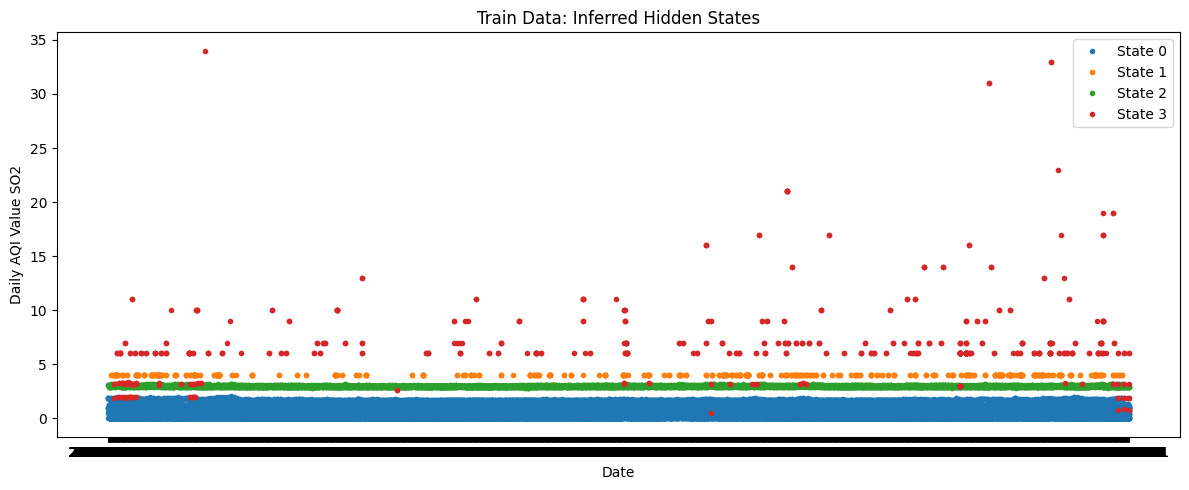

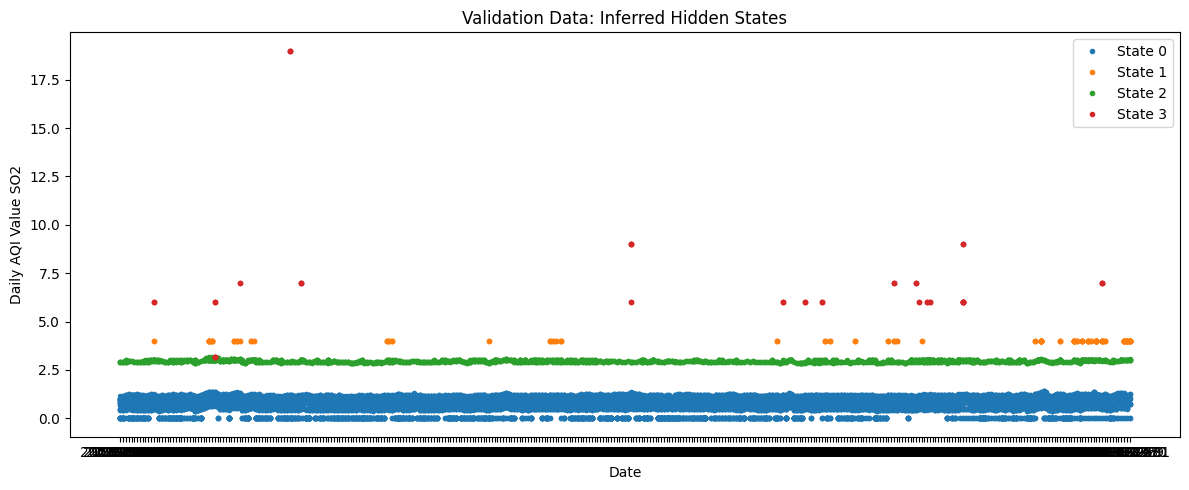

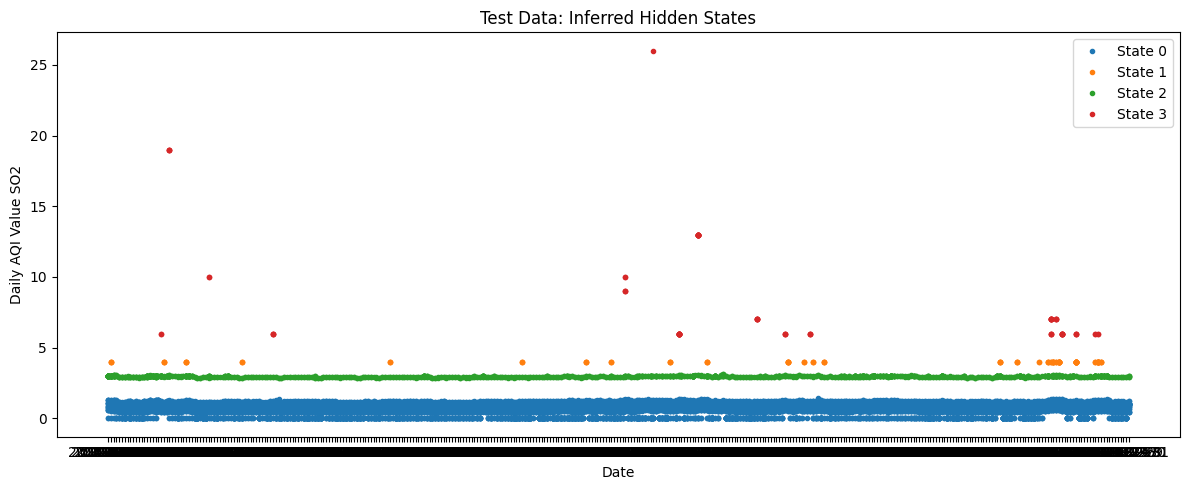


Most recent hidden state in validation: 2
Most likely next hidden state: 2 (Probability: 0.61)
Sampled next 3 Daily AQI Value SO2: [0.17994103 0.86988393 0.85066246]


In [4]:
run_hmm('Daily AQI Value CO', n_states=4, plot=False)
run_hmm('Daily AQI Value NO2', n_states=4, plot=False)
run_hmm('Daily AQI Value Ozone', n_states=4, plot=False)
run_hmm('Daily AQI Value PM2.5', n_states=4, plot=False)
run_hmm('Daily AQI Value PM10', n_states=4, plot=False)
run_hmm('Daily AQI Value SO2', n_states=4, plot=True)

In [5]:
def run_hmm(aqi_var, n_states=4, plot=False):
    """
    Fits a Gaussian Hidden Markov Model (HMM) to historical AQI data for a given pollutant.
    
    Parameters:
    aqi_var : str
        The name of the AQI variable to model.
        
    n_states : int, optional (default=4)
        The number of hidden states to use in the HMM.
        
    plot : bool, optional (default=False)
        Whether to visualize the hidden states across the train/validate/test sets.
    
    Returns:
    None
        Prints the current and next most likely hidden state along with sampled AQI forecasts.
        Also shows plots if `plot=True`.
    """
    # Subset the selected variable and date from each data partition
    train = train_df[['Date', aqi_var]].copy()
    validate = validate_df[['Date', aqi_var]].copy()
    test = test_df[['Date', aqi_var]].copy()

    # Scale the AQI values for stability
    scaler = StandardScaler()
    train_scaled = scaler.fit_transform(train[[aqi_var]])
    validate_scaled = scaler.transform(validate[[aqi_var]])
    test_scaled = scaler.transform(test[[aqi_var]])

    # Initialize and fit the Gaussian HMM
    hmm = GaussianHMM(n_components=n_states, covariance_type='diag', n_iter=200, random_state=42)
    hmm.fit(train_scaled)

    # Predict hidden states on train, validate, and test sets 
    train['Hidden_State'] = hmm.predict(train_scaled)
    validate['Hidden_State'] = hmm.predict(validate_scaled)
    test['Hidden_State'] = hmm.predict(test_scaled)

    # Plot hidden states vs AQI 
    if plot:
        fig, axs = plt.subplots(3, 1, figsize=(14, 10), sharex=False)
        def plot_hidden_states(df, ax, title, zoom_year=None):
            """
            Helper function to plot hidden states over time for a given dataset.
            """
            plot_df = df.copy()
            if zoom_year:
                plot_df['Date'] = pd.to_datetime(plot_df['Date'])
                plot_df = plot_df[plot_df['Date'].dt.year == zoom_year]
                
            for state in range(n_states):
                mask = plot_df['Hidden_State'] == state
                ax.plot(plot_df['Date'][mask], plot_df[aqi_var][mask], '.', label=f'State {state}', markersize=10)

            ax.set_title(title, fontsize=24)
            ax.set_ylabel(aqi_var, fontsize=20)
            ax.legend(loc='upper right', fontsize=14)
            ax.tick_params(axis='both', labelsize=18)

        plot_hidden_states(train, axs[0], 'Train Data', zoom_year=2022)
        plot_hidden_states(validate, axs[1], 'Validation Data')
        plot_hidden_states(test, axs[2], 'Test Data')

        axs[2].set_xlabel('Date', fontsize=20)
        plt.tight_layout()
        plt.show()

    # Forecast next hidden state based on latest validation state
    last_val_state = validate['Hidden_State'].iloc[-1]
    next_state_probs = hmm.transmat_[last_val_state]
    most_likely_next_state = np.argmax(next_state_probs)

    print(f'\nMost recent hidden state in validation: {last_val_state}')
    print(f'Most likely next hidden state: {most_likely_next_state} (Probability: {next_state_probs[most_likely_next_state]:.2f})')

    # Generate 3-day AQI forecast by sampling from the most likely state's emission distribution
    samples, _ = hmm.sample(3) 
    samples_unscaled = scaler.inverse_transform(samples)
    print(f'Sampled next 3 {aqi_var}:', samples_unscaled.flatten())


Most recent hidden state in validation: 1
Most likely next hidden state: 1 (Probability: 0.70)
Sampled next 3 Daily AQI Value CO: [ 5.68388091 10.65858964 10.5199967 ]

Most recent hidden state in validation: 3
Most likely next hidden state: 3 (Probability: 0.75)
Sampled next 3 Daily AQI Value NO2: [30.48122657 39.5490886  39.29646242]

Most recent hidden state in validation: 1
Most likely next hidden state: 1 (Probability: 0.94)
Sampled next 3 Daily AQI Value Ozone: [13.57218767 23.02564719 22.76227845]

Most recent hidden state in validation: 3
Most likely next hidden state: 3 (Probability: 0.94)
Sampled next 3 Daily AQI Value PM2.5: [41.25859115 53.44351699 53.10405094]

Most recent hidden state in validation: 1
Most likely next hidden state: 1 (Probability: 0.76)
Sampled next 3 Daily AQI Value PM10: [18.22675721 11.69405024 11.51989708]

Most recent hidden state in validation: 2
Most likely next hidden state: 2 (Probability: 0.61)
Sampled next 3 Daily AQI Value SO2: [0.17994103 0.

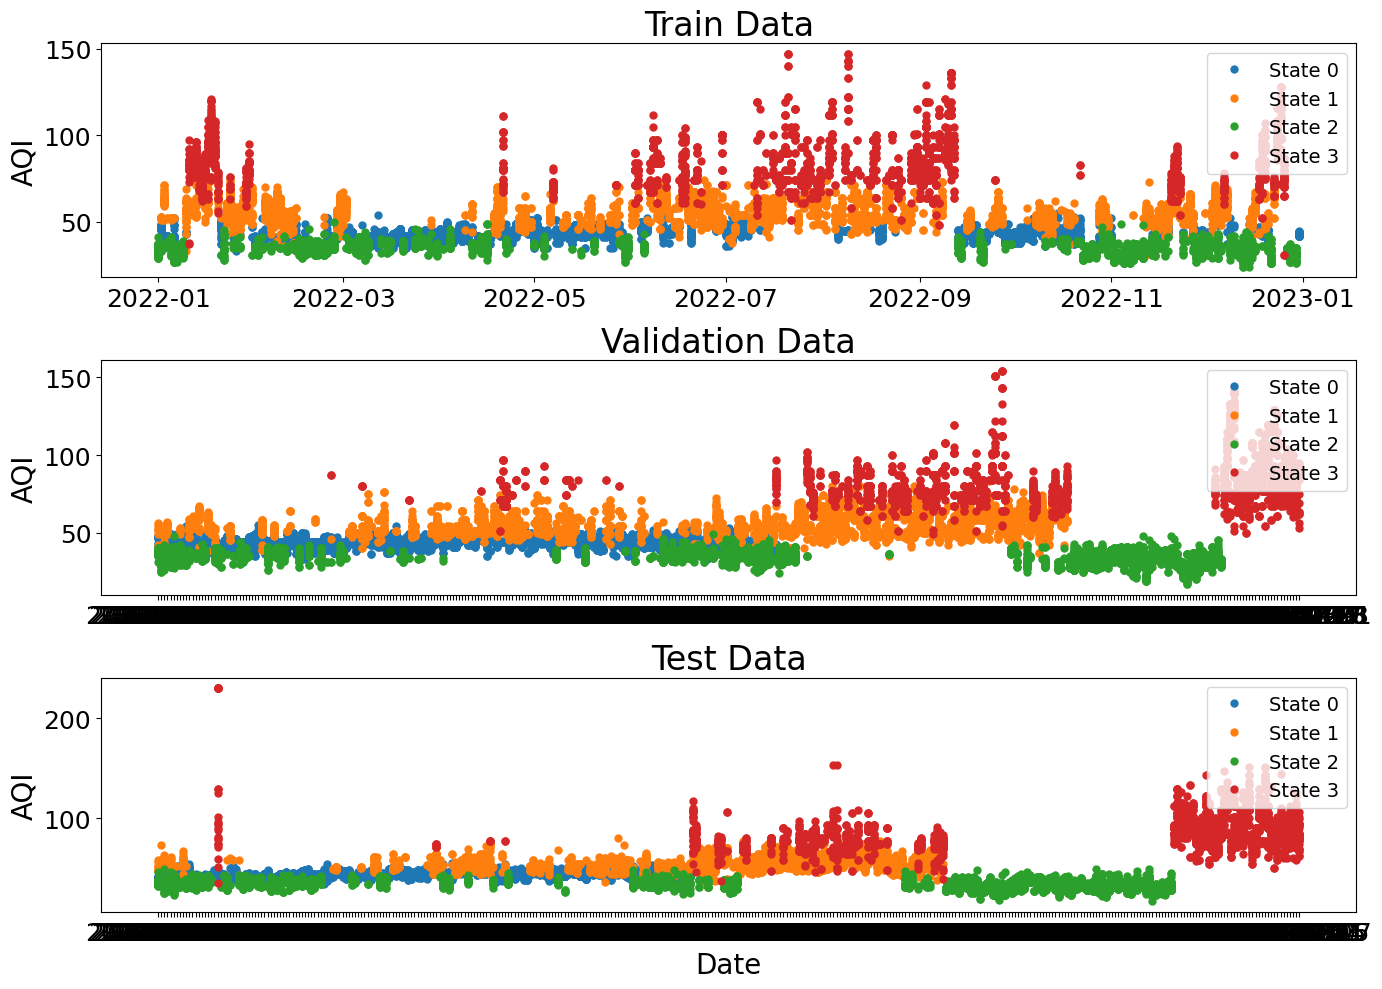


Most recent hidden state in validation: 3
Most likely next hidden state: 3 (Probability: 0.93)
Sampled next 3 AQI: [47.28572232 57.88848429 57.59309655]


In [6]:
run_hmm('Daily AQI Value CO', n_states=4, plot=False)
run_hmm('Daily AQI Value NO2', n_states=4, plot=False)
run_hmm('Daily AQI Value Ozone', n_states=4, plot=False)
run_hmm('Daily AQI Value PM2.5', n_states=4, plot=False)
run_hmm('Daily AQI Value PM10', n_states=4, plot=False)
run_hmm('Daily AQI Value SO2', n_states=4, plot=False)
run_hmm('AQI', n_states=4, plot=True)